## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
import tensorflow as tf

## Load the Dataset

In [67]:
(x_train, _), (x_test, _) = mnist.load_data()

In [68]:
# reshape in the input data for the model
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [69]:
x_train.shape

(60000, 784)

## Add Noise to the Image

In [70]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [71]:
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Exploratory Data Analysis

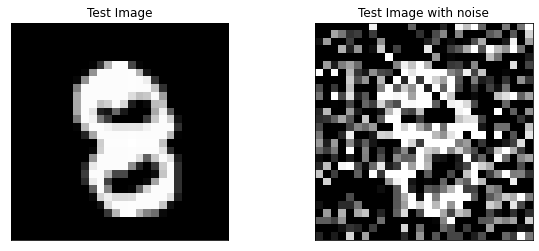

In [72]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
ax.set_title('Test Image')
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
ax.set_title('Test Image with noise')
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

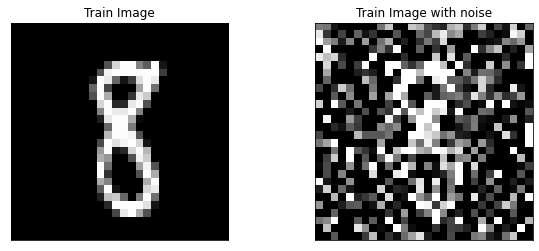

In [73]:
index = np.random.randint(len(x_train))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
ax.set_title('Train Image')
plt.imshow(x_train[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
ax.set_title('Train Image with noise')
plt.imshow(x_train_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Model Creation

In [74]:
model = Sequential()
model.add(Dense(784, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 300)               30300     
                                                                 
 dense_4 (Dense)             (None, 500)               150500    
                                                                 
 dense_5 (Dense)             (None, 784)               392784    
                                                                 
Total params: 1,146,484
Trainable params: 1,146,484
No

In [76]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [77]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test),callbacks=[callback])

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.0577 - val_loss: 0.0364
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0319 - val_loss: 0.0280
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0266 - val_loss: 0.0253
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0240 - val_loss: 0.0234
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0222 - val_loss: 0.0220
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0210 - val_loss: 0.0209
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0200 - val_loss: 0.0205
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0192 - val_loss: 0.0199
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0185 - val_loss: 0.0198
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0180 - val_loss: 0.0190

## Visualize the Results

Model is already trained, find it in outlook under denoising folder.

In [ ]:
# !unzip "/content/model_save.zip"
# import keras.models
# model = keras.models.load_model("/content/model_save")

In [78]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

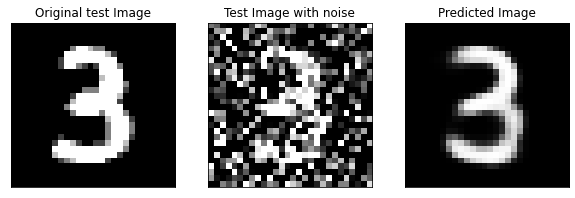

In [82]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))

# Display orignial image
ax = plt.subplot(1, 3, 1)
ax.set_title('Original test Image')
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display noisy image
ax = plt.subplot(1, 3, 2)
ax.set_title('Test Image with noise')
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display denoised image
ax = plt.subplot(1, 3, 3)
ax.set_title('Predicted Image')
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()